In [1]:
import ROOT as R
R.gStyle.SetOptFit(1111)

def DrawSensitivity(method,syst,range_x):
    nameMap = {
    'gain_A':'IFG amp.',
    'gain_T':'IFG #tau',
    'stdp_A':'STDP amp.',
    'stdp_T':'STDP #tau',

    }

    fitRes = R.TFile('../output/Run2C_%smethod_%s_Scan_random.root'%(method,syst))

    R_list = []
    chi2_list = []
    for n in range(20):
        func_name = 'func_28paras_run23_sjtu_Run2C_%smethod_%s_%s'%(method,syst,n)
        func = fitRes.Get(func_name)
        R_ = func.GetParameter(3)
        eR_ = func.GetParError(3)
        R_list.append([R_,eR_])
        chi2 = func.GetChisquare()
        ndf = func.GetNDF()
        chi2_list.append(chi2/ndf)


    c = R.TCanvas()

    fit_func = R.TF1('fit_func','[0]+[1]*x',range_x[0],range_x[1]-0.1)
    fit_func.SetParNames('Y-intercept','Sensitivity')
    fit_func.SetLineColor(2)
    fit_func.SetNpx(5000)



    R_graph = R.TGraphErrors()
    range_x_n = [int(range_x[0]/0.1),int(range_x[1]/0.1)]
    for n in range(*range_x_n):
        np = R_graph.GetN()
        # print (np,n*0.1)
        R_graph.SetPoint(np,n*0.1,R_list[n][0])
        R_graph.SetPointError(np,0,R_list[n][1])


    R_graph.Fit('fit_func','REMQ')    
    R_graph.SetTitle('Run2C, %s-method, %s scan;Multiplier;R [ppm]'%(method,nameMap[syst]))
    R_graph.Draw('AP')
    R_graph.GetYaxis().SetRangeUser(-72,-67)
    # print (range_x)
    R_graph.GetXaxis().SetRangeUser(range_x[0]-0.1,range_x[1])
    R_graph.SetMarkerStyle(8)
    R_graph.SetMarkerSize(0.8)
    R_graph.SetLineWidth(1)
    c.Draw()

    c2=R.TCanvas()
    chi2_graph = R.TGraph()

    for n in range(*range_x_n):
        chi2_graph.SetPoint(chi2_graph.GetN(),n*0.1,chi2_list[n])
    chi2_graph.SetTitle('Run2C, %s-method, %s scan;Multiplier;Chi2/NDF'%(method,nameMap[syst]))
    chi2_graph.Draw('ALP')

    chi2_graph.GetXaxis().SetRangeUser(range_x[0]-0.1,range_x[1])
    chi2_graph.SetMarkerStyle(8)
    chi2_graph.SetMarkerSize(0.8)
    chi2_graph.SetLineWidth(1)
    c2.Draw()
    return [c,c2],[chi2_graph,R_graph,fit_func,fitRes]

Welcome to JupyROOT 6.24/06


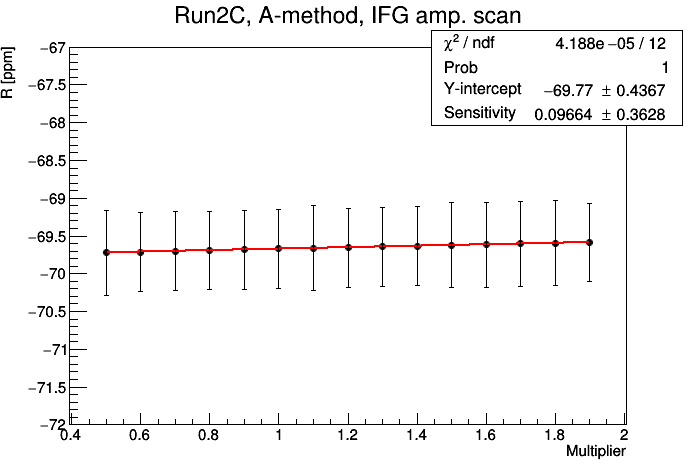

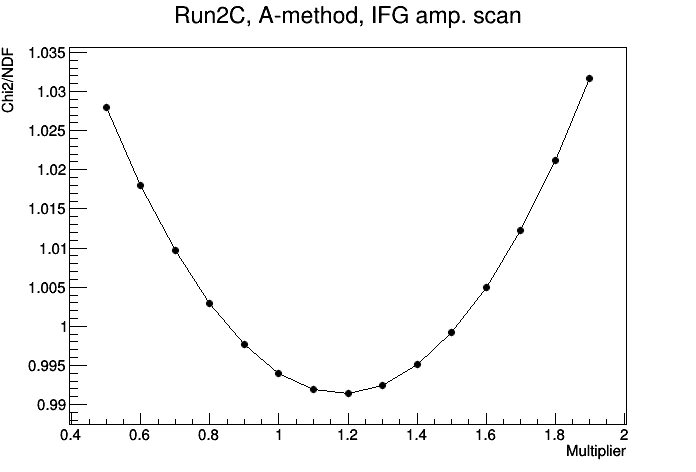

In [2]:
method = 'A'
syst = 'gain_A'
cs = DrawSensitivity(method,syst,[0.5,2.])

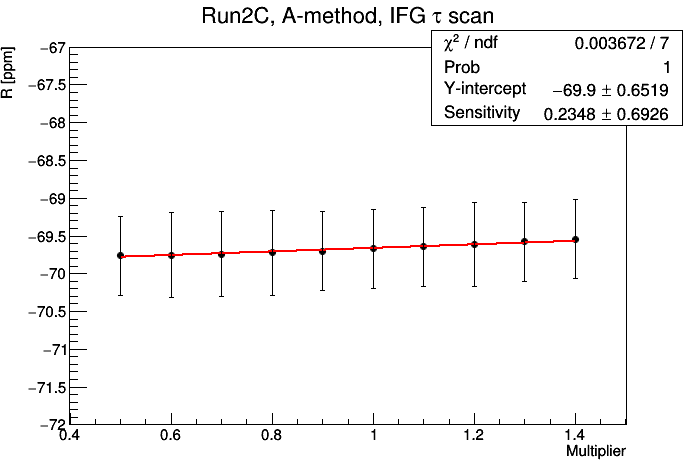

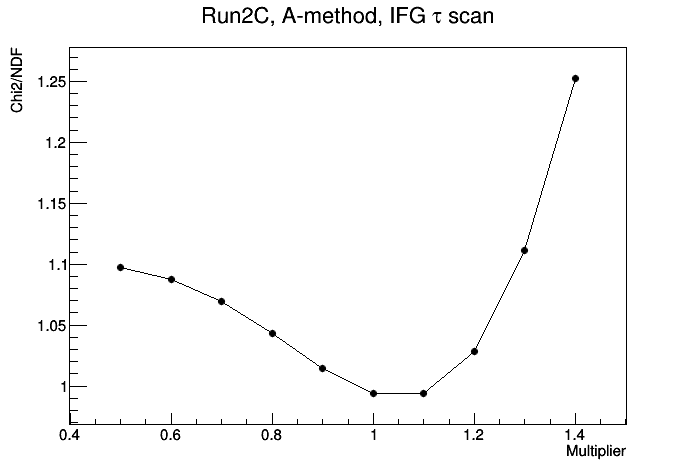

In [3]:
method = 'A'
syst = 'gain_T'
cs = DrawSensitivity(method,syst,[0.5,1.5])

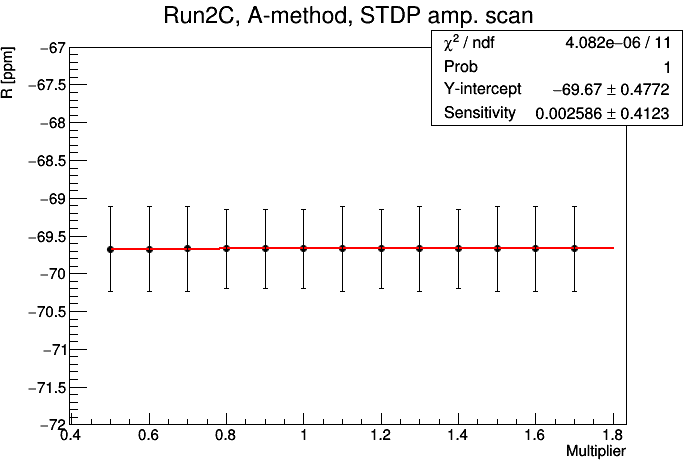

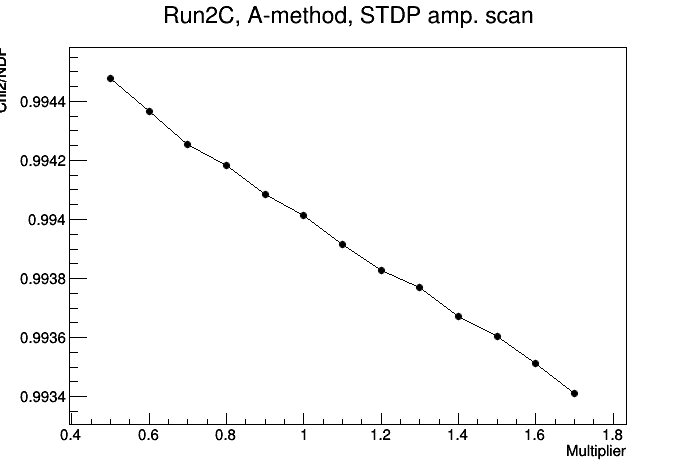

In [4]:

method = 'A'
syst = 'stdp_A'
cs = DrawSensitivity(method,syst,[0.5,1.9])

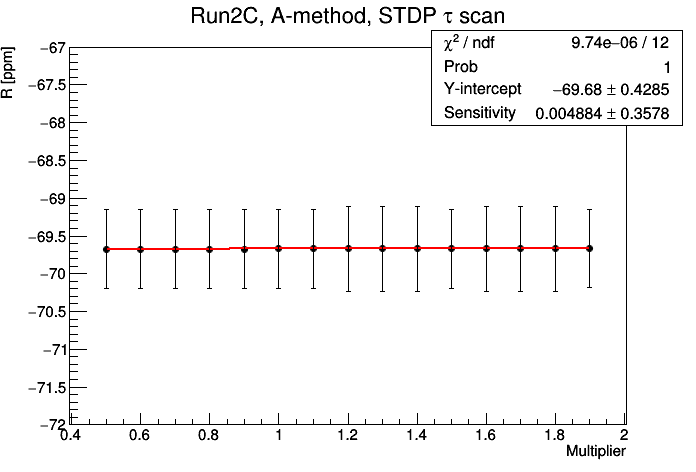

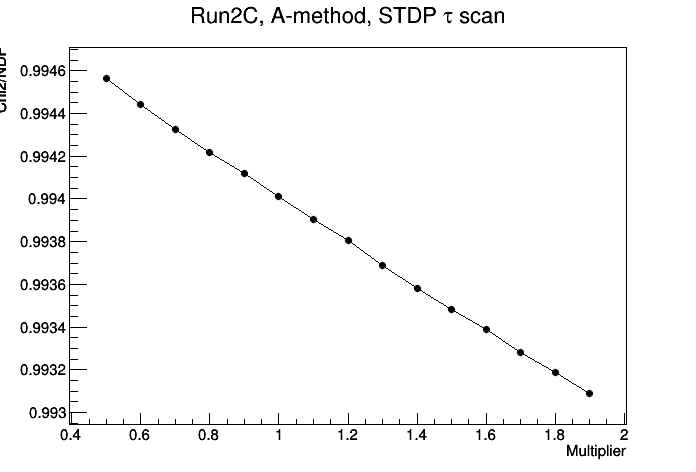

In [5]:
method = 'A'
syst = 'stdp_T'
cs = DrawSensitivity(method,syst,[0.5,2])

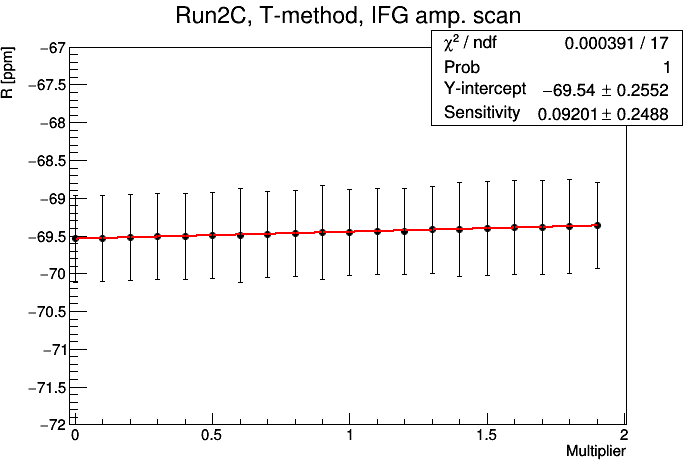

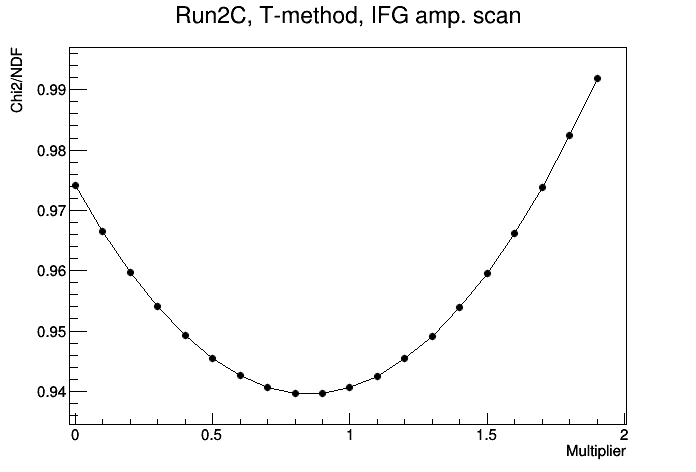

In [12]:
method = 'T'
syst = 'gain_A'
cs = DrawSensitivity(method,syst,[0.,2.])

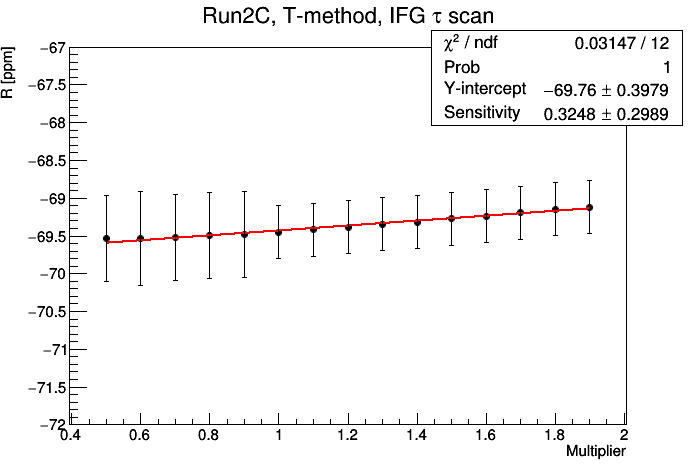

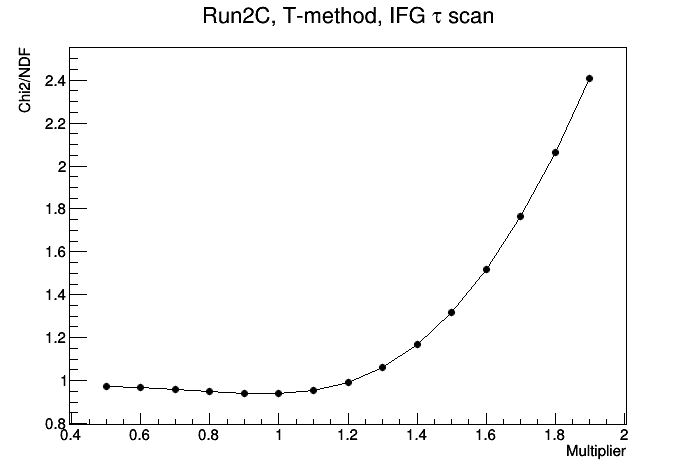

In [16]:
method = 'T'
syst = 'gain_T'
cs = DrawSensitivity(method,syst,[0.5,2])

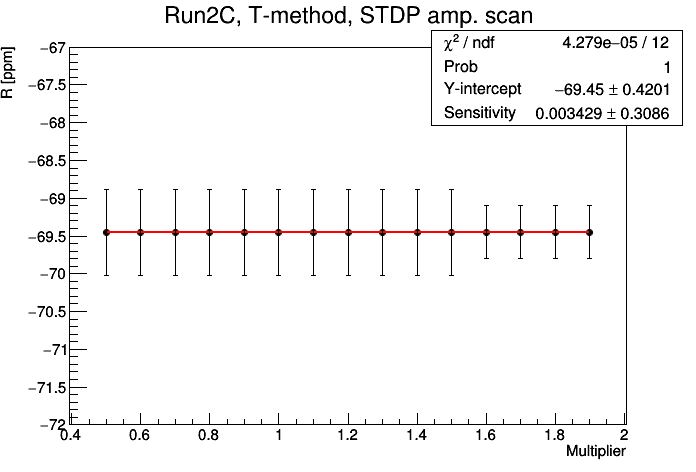

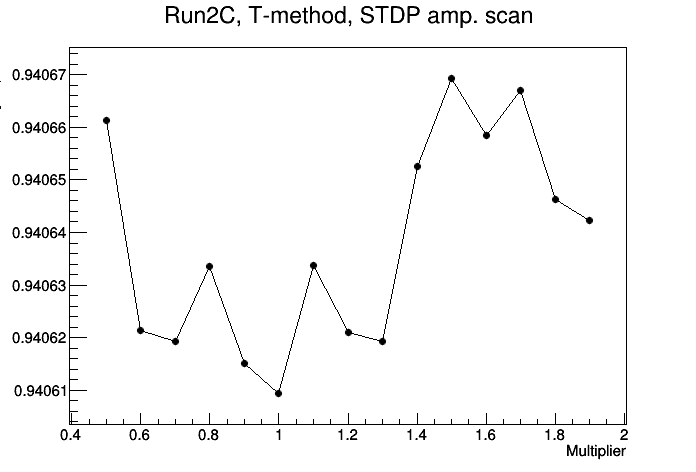

In [17]:
method = 'T'
syst = 'stdp_A'
cs = DrawSensitivity(method,syst,[0.5,2])

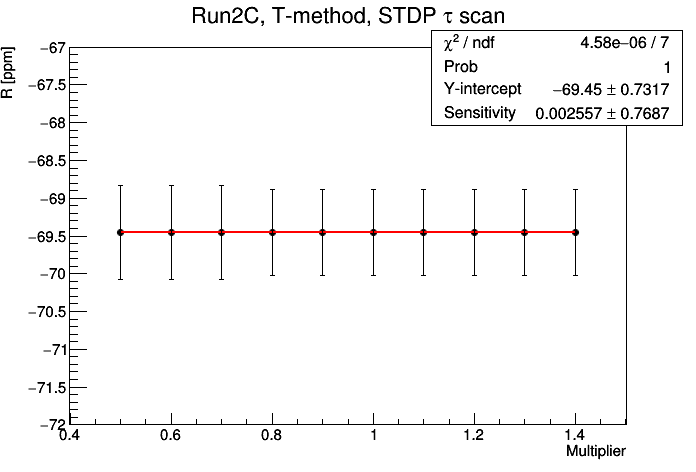

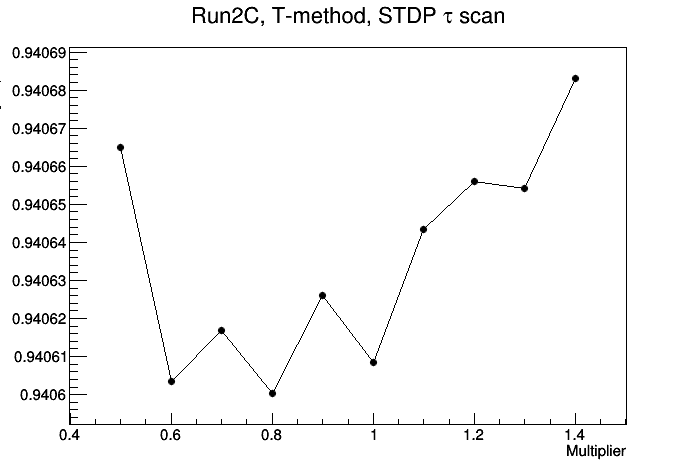

In [18]:
method = 'T'
syst = 'stdp_T'
cs = DrawSensitivity(method,syst,[0.5,1.5])